In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 

In [2]:
# load data
#filename = 'https://raw.githubusercontent.com/slmsshk/DataSet/main/TSNE_data.csv'
dataframe = pd.read_csv("TSNE_data.csv")

In [3]:
dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# Split-out validation dataset
array = dataframe.values
# separate array into input and output components
X = array[:,1:]
Y = array[:,0]

In [6]:
dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data_tsne = TSNE(n_components=2).fit_transform(X)

In [8]:
data_tsne

array([[ 41.951733 ,  -9.053222 ],
       [ 41.330006 , -11.671999 ],
       [ 36.556046 , -11.213191 ],
       ...,
       [ 21.469524 ,  -3.2380936],
       [ 39.30619  , -10.897295 ],
       [-37.964745 , -25.586412 ]], dtype=float32)

In [9]:
tsne_df = pd.DataFrame(data_tsne, columns=["x1","x2"])
tsne_df["diagnosis"]=dataframe.diagnosis
tsne_df

,x1,x2,diagnosis
0,41.951733,-9.053222,M
1,41.330006,-11.671999,M
2,36.556046,-11.213191,M
3,-17.954514,1.827379,M
4,35.531044,-9.161068,M
...,...,...,...
564,42.703888,-12.612639,M
565,37.523232,-10.866976,M
566,21.469524,-3.238094,M
567,39.306190,-10.897295,M


<Axes: xlabel='x1', ylabel='x2'>

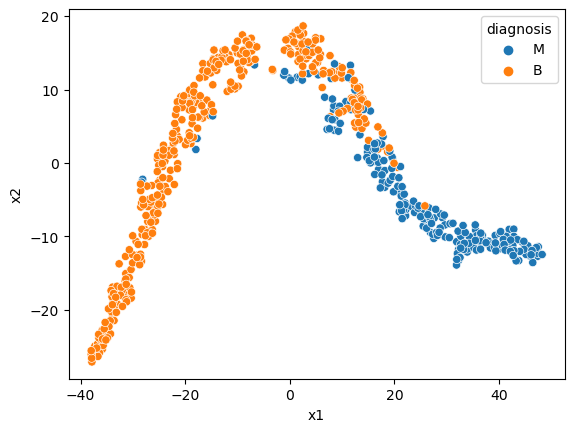

In [10]:
sns.scatterplot(data=tsne_df,x='x1',y='x2',hue='diagnosis',legend="full",alpha=1.0)

In [11]:
data_tsne1 = TSNE(n_components=3).fit_transform(X)

In [12]:
data_tsne1

array([[ 17.863321  ,  -8.15927   ,   3.5288098 ],
       [ 18.166645  ,  -6.4801702 ,   4.4443254 ],
       [ 15.85633   ,  -5.703793  ,   2.9761608 ],
       ...,
       [ 10.271409  ,  -0.72777987,  -3.3085167 ],
       [ 17.084951  ,  -6.016835  ,   3.848897  ],
       [-21.51965   ,  -0.17615418,   1.8935654 ]], dtype=float32)

In [13]:
tsne_df1 = pd.DataFrame(data_tsne1, columns=["x1","x2","x3"])
tsne_df1["diagnosis"]=dataframe.diagnosis
tsne_df1

,x1,x2,x3,diagnosis
0,17.863321,-8.159270,3.528810,M
1,18.166645,-6.480170,4.444325,M
2,15.856330,-5.703793,2.976161,M
3,-4.582957,-3.830114,2.769686,M
4,15.382783,-4.143724,2.857143,M
...,...,...,...,...
564,19.106697,-6.351874,4.900377,M
565,16.344187,-5.397259,3.446756,M
566,10.271409,-0.727780,-3.308517,M
567,17.084951,-6.016835,3.848897,M


C:\Users\shiva\AppData\Local\Temp\ipykernel_9248\2506061537.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(x, y, z, s=20, c=col, marker='o', cmap=cmap, alpha=1)
C:\Users\shiva\anaconda3\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


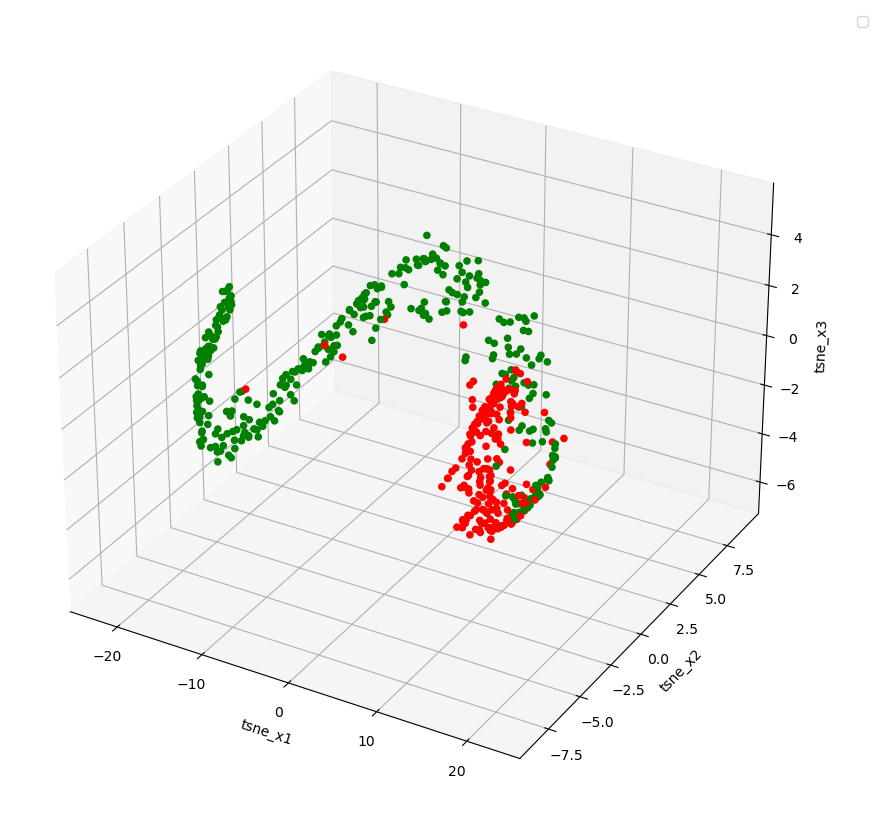

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(8,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = tsne_df1['x1']
y = tsne_df1['x2']
z = tsne_df1['x3']

ax.set_xlabel("tsne_x1")
ax.set_ylabel("tsne_x2")
ax.set_zlabel("tsne_x3")
# plot
col=tsne_df1['diagnosis'].map({'M':'r','B':'g'})
sc = ax.scatter(x, y, z, s=20, c=col, marker='o', cmap=cmap, alpha=1)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
# save
# plt.savefig("scatter_hue", bbox_inches='tight')